In [168]:
import pandas as pd

# Importar os dados

In [169]:
df = pd.read_csv("/content/Titanic.csv", sep=",", encoding="ISO-8859-1")

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Colunas

- `Survived`: 1 se a pessoa sobreviveu;
- `Pclass`: nível do ticket, 1 mais caro, 2 medio, 3 mais barato;
- `SibSp`: número de irmãos/cônjuges no titanic;
- `Parch`: número de pais/filhos no titanic;


## Já é possível perceber que a coluna `Cabin` tem muitos valores nulos e por isso não é muito util na análise.

## A partir das descrições das colunas é possível perceber que as informações contidas em `Pclass` e `Fare` representam a informações similares.

In [171]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Remover colunas que não tem utilidade

In [172]:
col_inuteis = ["Name", "Ticket", "Cabin"] # ["Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]

df.drop(col_inuteis, axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


## Reorganizar colunas

In [173]:
df = df.loc[:, ["PassengerId", "Sex", "Age", "SibSp", "Parch", "Fare", "Pclass", "Embarked", "Survived"]] # df.loc[:, ["PassengerId", "Sex", "Age", "Pclass", "Survived"]]
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
0,892,male,34.5,0,0,7.8292,3,Q,0
1,893,female,47.0,1,0,7.0000,3,S,1
2,894,male,62.0,0,0,9.6875,2,Q,0
3,895,male,27.0,0,0,8.6625,3,S,0
4,896,female,22.0,1,1,12.2875,3,S,1


In [174]:
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
0,892,male,34.5,0,0,7.8292,3,Q,0
1,893,female,47.0,1,0,7.0000,3,S,1
2,894,male,62.0,0,0,9.6875,2,Q,0
3,895,male,27.0,0,0,8.6625,3,S,0
4,896,female,22.0,1,1,12.2875,3,S,1


# Verificar duplicatas

In [175]:
print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

df[df.duplicated()]

Número de linhas duplicadas: 0


,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived


# Verificar Nulos

In [176]:
df.isna().sum()

,0
PassengerId,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Pclass,0
Embarked,0
Survived,0


## 86 valores nulos em `Age`

### Média de `Age` por `Survived`


In [177]:
df.groupby("Survived")["Age"].mean()

,Age
Survived,
0,30.272732
1,30.272362


### Média de `Age` por `Pclass`

In [178]:
df.groupby("Pclass")["Age"].mean()

,Age
Pclass,
1,40.918367
2,28.777500
3,24.027945


### Média de `Age` por `Sex`

In [179]:
df.groupby("Sex")["Age"].mean()

,Age
Sex,
female,30.272362
male,30.272732


### Média de `Age` por `Survived`, `Sex`, `Pclass`

In [180]:
mean_age_df = df.groupby(["Survived", "Sex", "Pclass"])["Age"].mean().reset_index()
mean_age_df

,Survived,Sex,Pclass,Age
0,0,male,1,40.520000
1,0,male,2,30.940678
2,0,male,3,24.525104
3,1,female,1,41.333333
4,1,female,2,24.376552
5,1,female,3,23.073400


In [181]:
# Renomear a coluna
mean_age_df = mean_age_df.rename(columns={"Age": "GroupAgeMean"})

# Faz o merge dos dois df
df_with_means = df.merge(mean_age_df, on=["Survived", "Sex", "Pclass"], how="left")

# Subsitui valores de `Age` nulos pela média do grupo
df_with_means["Age"] = df_with_means["Age"].fillna(df_with_means["GroupAgeMean"])

# Remover a coluna auxiliar
df = df_with_means.drop(columns="GroupAgeMean")

In [182]:
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
0,892,male,34.5,0,0,7.8292,3,Q,0
1,893,female,47.0,1,0,7.0000,3,S,1
2,894,male,62.0,0,0,9.6875,2,Q,0
3,895,male,27.0,0,0,8.6625,3,S,0
4,896,female,22.0,1,1,12.2875,3,S,1


In [183]:
df.dropna(axis=0, subset=["Fare"], inplace=True)

In [184]:
df.isna().sum()

,0
PassengerId,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Pclass,0
Embarked,0
Survived,0


In [185]:
df.groupby("Sex")["Survived"].value_counts()

,,count
Sex,Survived,
female,1,152
male,0,265


# Encodificação de variáveis

In [186]:
df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked,Survived
0,892,male,34.5,0,0,7.8292,3,Q,0
1,893,female,47.0,1,0,7.0000,3,S,1
2,894,male,62.0,0,0,9.6875,2,Q,0
3,895,male,27.0,0,0,8.6625,3,S,0
4,896,female,22.0,1,1,12.2875,3,S,1


## Dummy

In [187]:
atrib_nominais = ["Sex", "Embarked", "Survived"] # ["Sex", "Survived"]

In [188]:
df = pd.get_dummies(df, columns=atrib_nominais)
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
0,892,34.5,0,0,7.8292,3,False,True,False,True,False,True,False
1,893,47.0,1,0,7.0000,3,True,False,False,False,True,False,True
2,894,62.0,0,0,9.6875,2,False,True,False,True,False,True,False
3,895,27.0,0,0,8.6625,3,False,True,False,False,True,True,False
4,896,22.0,1,1,12.2875,3,True,False,False,False,True,False,True


## Ordinal

In [189]:
atrib_ordinais = ["SibSp", "Parch"] # ["Pclass"]

In [190]:
from sklearn.preprocessing import OrdinalEncoder

df["Pclass"] = df["Pclass"].astype(str)

encoder = OrdinalEncoder(categories=[["3", "2", "1"]])

df[["Pclass"]] = encoder.fit_transform(df[["Pclass"]])

In [191]:
encoder = OrdinalEncoder()

df[atrib_ordinais] = encoder.fit_transform(df[atrib_ordinais])

df.head()


,PassengerId,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
0,892,34.5,0.0,0.0,7.8292,0.0,False,True,False,True,False,True,False
1,893,47.0,1.0,0.0,7.0000,0.0,True,False,False,False,True,False,True
2,894,62.0,0.0,0.0,9.6875,1.0,False,True,False,True,False,True,False
3,895,27.0,0.0,0.0,8.6625,0.0,False,True,False,False,True,True,False
4,896,22.0,1.0,1.0,12.2875,0.0,True,False,False,False,True,False,True


# Normalização

In [192]:
num_columns = ["Age", "Fare"]

In [193]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[num_columns] = scaler.fit_transform(df[num_columns])

df.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
0,892,0.452723,0.0,0.0,0.015282,0.0,False,True,False,True,False,True,False
1,893,0.617566,1.0,0.0,0.013663,0.0,True,False,False,False,True,False,True
2,894,0.815377,0.0,0.0,0.018909,1.0,False,True,False,True,False,True,False
3,895,0.353818,0.0,0.0,0.016908,0.0,False,True,False,False,True,True,False
4,896,0.287881,1.0,1.0,0.023984,0.0,True,False,False,False,True,False,True


In [194]:
df.set_index("PassengerId", inplace=True)
df.head()

,Age,SibSp,Parch,Fare,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_0,Survived_1
PassengerId,,,,,,,,,,,,
892,0.452723,0.0,0.0,0.015282,0.0,False,True,False,True,False,True,False
893,0.617566,1.0,0.0,0.013663,0.0,True,False,False,False,True,False,True
894,0.815377,0.0,0.0,0.018909,1.0,False,True,False,True,False,True,False
895,0.353818,0.0,0.0,0.016908,0.0,False,True,False,False,True,True,False
896,0.287881,1.0,1.0,0.023984,0.0,True,False,False,False,True,False,True


# Test

<Axes: >

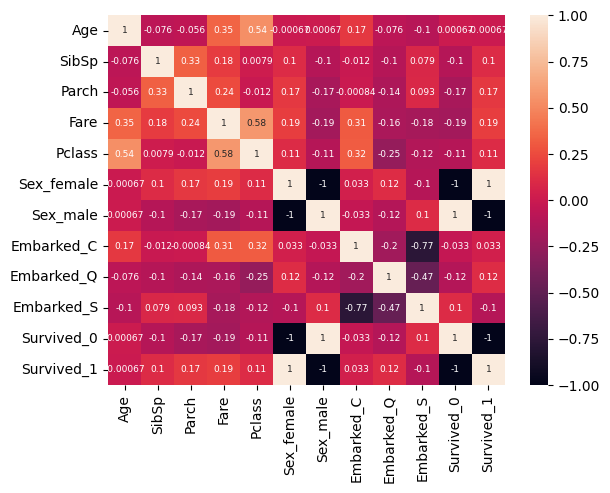

In [195]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True, annot_kws={"size": 6.5}, cmap="rocket")